# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

испорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Познакомимся с данными

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
display(data.head(5))
display(data.tail(5))
data.sample(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4289,0,38.0,44500.0,0,0
2366,0,18.0,54000.0,0,0
3869,1,25.0,42900.0,2,0
4791,1,30.0,35400.0,4,0
3539,0,19.0,36700.0,0,0


Проверка дубликатов

In [3]:
data.duplicated().sum()

153

Ожидаемо, они тут есть, однако тк у объектов нет характерных признаков по которым мы можем понять настоящий ли это дубликат или совпадение(с текущими значениями оно запросто может быть) оставим все как есть

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков нет, а типы данных и название признаков изменю, а также посмотрю на распредление признаков для поиска аномалии

In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Предварительно данные лежат в хороших диапазонах, но взгялну на них с помощью графиков

In [6]:
data = data.rename(columns={'Пол':'Sex', 'Возраст':'Age', 'Зарплата':'Salary', 'Члены семьи':'Family_mem', 'Страховые выплаты':'Insurance_payments'})

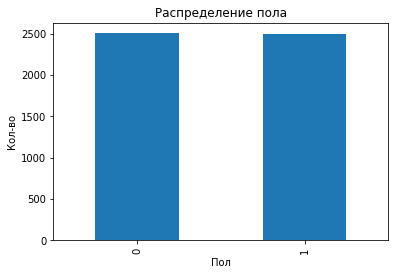

In [7]:
data['Sex'].value_counts().plot(kind='bar')
plt.title('Распределение пола')
plt.xlabel('Пол')
plt.ylabel('Кол-во')
plt.show()


Пол - качетсвенный признак, для него достаточно будет изобразить столбчатую или круговую диаграмму

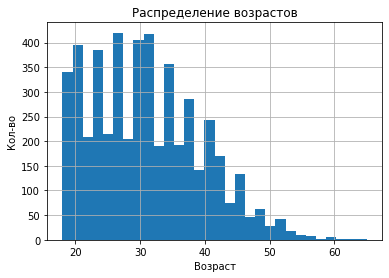

In [8]:
data['Age'].hist(bins=30)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Кол-во')
plt.show()


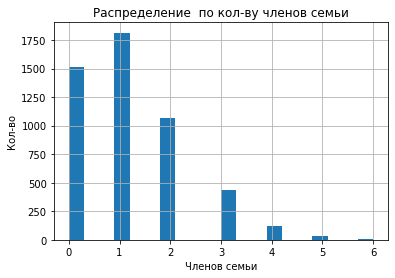

In [9]:
data['Family_mem'].hist(bins=20)
plt.title('Распределение  по кол-ву членов семьи')
plt.xlabel('Членов семьи')
plt.ylabel('Кол-во')
plt.show()


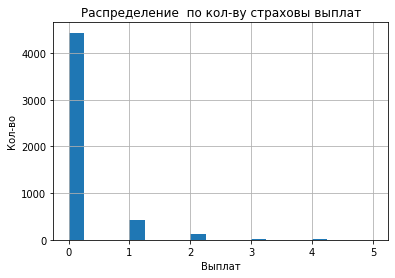

In [10]:
data['Insurance_payments'].hist(bins=20)
plt.title('Распределение  по кол-ву страховы выплат')
plt.xlabel('Выплат')
plt.ylabel('Кол-во')
plt.show()


Все эти признаки - количественные и дискретные, хорошо подойдет столбчатая диаграмма или гистрограмма

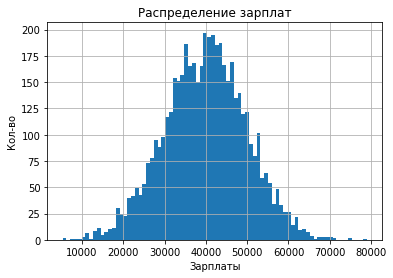

In [11]:
data['Salary'].hist(bins=80)
plt.title('Распределение зарплат')
plt.xlabel('Зарплаты')
plt.ylabel('Кол-во')
plt.show()

Зарплаты - количесвенная и непрерывная переменная, значит можно посмотреть гистограммой с подобранными корзинами или графиком плотности

**Вывод**

С данными ознакомились, больших проблем не обнаружено, например аномалий или пропусков 

Сделал небольшие правки - изменил название признакам и тип данных для некоторых из них

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

$$
a = X1 *(X^T X)^{-1} X^T y
$$

## $$
w' = (XP^T XP)^{-1} XP^T y
$$

$$
w' = (P^T X^T XP)^{-1} P^T X^T y
$$

$$
w' = ((X^TX)P)^{-1} P^{T^{-1}}P^T X^T y
$$

$$
w' = (P)^{-1} (X^T X)^{-1} X^T y
$$

Это выражение и есть наше w
$$
(X^T X)^{-1} X^T y
$$

$$
w' = (P)^{-1} w
$$



**Вывод**

В итоге получили тот же результат, что и без умножения признаков на Р

## Алгоритм преобразования

**Алгоритм**

Умножение на обратимую матрицу

Шаги
- Создать обратимую матрицу(без зависимых векторов)
- Умножить на нее признаки

К тому же, при условии, что матрица признаков(n,m), наша матрица должна быть (n,n). Строк должно быть столько для кореектоного умножения, а столбцов для получения такой же по размерности матрицы после умножения тк при умножений на квадратную матрицу, правая сохранит свой размер 

**Обоснование**

Конечно, можно рассмтотреть много вариантов преобразования, но таким способом мы изменим оригинальные данные, как требуется по заданию, и что самое главное не изменим качество модели, это доказано выше в пункте 2.

## Проверка алгоритма

Разделим датасет на прищнаки и целевой признак

In [12]:
features = data.drop('Insurance_payments',axis=1)
target = data['Insurance_payments']

А теперь на обучающую и тестовую выборки

In [13]:
features_train, features_test, target_train, target_test = train_test_split( features, target, test_size=0.25, random_state=12345)

In [14]:
model = LinearRegression()
model.fit(features_train, target_train)
R2 = r2_score(target_test, model.predict(features_test))
R2

0.43522757127026546

Теперь зашифруем признаки с помощью способа озвученого в 3 пунте. Узнаем точный размер матрицы

In [15]:
features_train.shape

(3750, 4)

Создадим новую матрицу и проверим обратима ли она

In [16]:
P = np.random.randint (0, 20, (4, 4))
if(np.linalg.det(P)!= 0):
    new_features = features @ P
else:
    print('Матрица необратима')

In [17]:
new_features

,0,1,2,3
0,744024.0,694462.0,198966.0,744270.0
1,570015.0,532065.0,152616.0,570285.0
2,315000.0,294029.0,84377.0,315174.0
3,625530.0,583859.0,167109.0,625644.0
4,391509.0,365430.0,104779.0,391683.0
...,...,...,...,...
4995,535530.0,499866.0,143200.0,535686.0
4996,786015.0,733653.0,210060.0,786213.0
4997,508530.0,474658.0,135896.0,508638.0
4998,490554.0,457881.0,131155.0,490674.0


Готово. Теперь изменим исходные данные и проверим качество модели

In [18]:
features_train, features_test, target_train, target_test = train_test_split( new_features, target, test_size=0.25, random_state=12345)

In [19]:
model = LinearRegression()
model.fit(features_train, target_train)
R2 = r2_score(target_test, model.predict(features_test))
R2

0.43522757127008804

**Итог**
Результат метрики R2 тот же, ничего не поменялось. Значит, хоть данные и были изменены и по ним сложно сказать что-либо исходных данных, благодарся правильному способу изменения модель предсказывает с той же точностью